In [1]:
!pip install pmdarima

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
stocks_data = {}

for ticker in tickers:
    print(f"Baixando dados para {ticker}...")
    data = yf.download(ticker, start="2017-01-01", end="2023-12-31")
    
    if 'Adj Close' in data.columns:
        data.index = pd.to_datetime(data.index)
        data = data.asfreq('D')  # Define a frequência como diária
        data['Adj Close'] = data['Adj Close'].interpolate(method='time')  # Preenchendo NaNs
        data['Ticker'] = ticker  # Adicionar a coluna 'Ticker'
        stocks_data[ticker] = data[['Adj Close', 'Ticker']] 

Baixando dados para AAPL...


[*********************100%***********************]  1 of 1 completed


Baixando dados para MSFT...


[*********************100%***********************]  1 of 1 completed


Baixando dados para GOOGL...


[*********************100%***********************]  1 of 1 completed


Baixando dados para AMZN...


[*********************100%***********************]  1 of 1 completed


Baixando dados para META...


[*********************100%***********************]  1 of 1 completed


In [3]:
predicted_values = pd.DataFrame()

ADF Statistic for AAPL: -0.03242561176268507
P-value for AAPL: 0.9557669408356458


<Figure size 864x432 with 0 Axes>

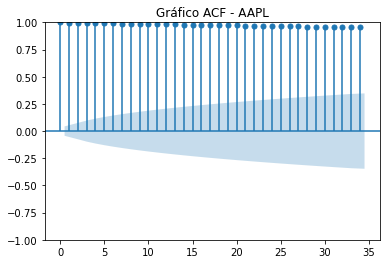

<Figure size 864x432 with 0 Axes>

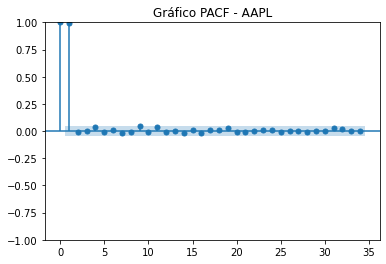

ADF Statistic after differencing for AAPL: -12.23289099165218
P-value after differencing for AAPL: 1.0438289909231036e-22

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7199.721, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7201.192, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7201.194, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7202.303, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7203.192, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.314 seconds
Melhor modelo ARIMA para AAPL: (0, 1, 0)

Métricas para AAPL:
MSE: 432.6743
MAE: 17.1037
R²: -0.1680
MAPE: 0.11%

ADF Statistic for MSFT: -0.44813554222353374
P-value for MSFT: 0.9017463607524919


<Figure size 864x432 with 0 Axes>

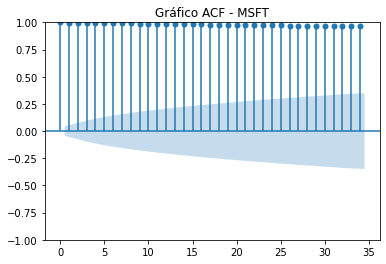

<Figure size 864x432 with 0 Axes>

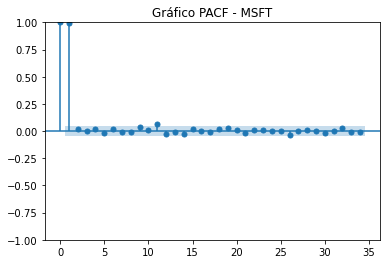

ADF Statistic after differencing for MSFT: -10.73218681399486
P-value after differencing for MSFT: 2.9604012175536e-19

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9547.450, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9539.452, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9539.584, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9549.239, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9541.432, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9541.438, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9543.320, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9541.804, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.907 seconds
Melhor modelo ARIMA para MSFT: (1, 1, 0)

Métricas para MSFT:
MSE: 1306.7427
MAE: 30.0216
R²: 0.4069
MAPE: 0.11%

ADF Statistic for GOOGL: -0.6539197979277692
P-value for GOOGL: 0.8583271469678655


<Figure size 864x432 with 0 Axes>

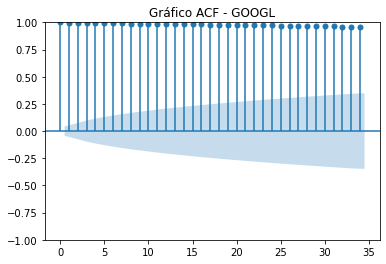

<Figure size 864x432 with 0 Axes>

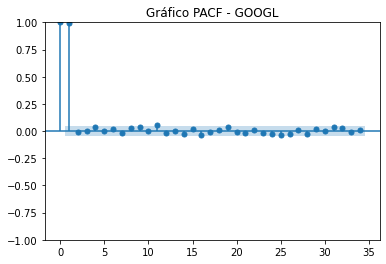

ADF Statistic after differencing for GOOGL: -12.69379204787956
P-value after differencing for GOOGL: 1.1173879315956738e-23

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6455.905, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6457.871, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6457.871, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6455.996, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6459.871, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.322 seconds
Melhor modelo ARIMA para GOOGL: (0, 1, 0)

Métricas para GOOGL:
MSE: 348.8099
MAE: 14.7130
R²: -0.2527
MAPE: 0.15%

ADF Statistic for AMZN: -1.4754540913381833
P-value for AMZN: 0.5456170288584148


<Figure size 864x432 with 0 Axes>

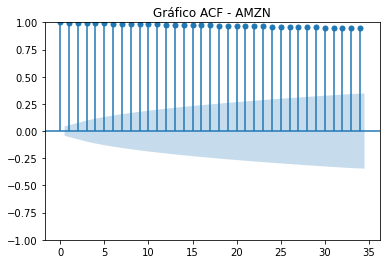

<Figure size 864x432 with 0 Axes>

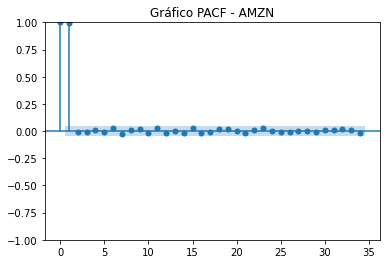

ADF Statistic after differencing for AMZN: -12.234125387971712
P-value after differencing for AMZN: 1.0374484468931011e-22

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8376.511, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8378.351, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8378.362, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8375.973, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8379.241, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.539 seconds
Melhor modelo ARIMA para AMZN: (0, 1, 0)

Métricas para AMZN:
MSE: 895.7448
MAE: 24.1966
R²: -1.3418
MAPE: 0.24%

ADF Statistic for META: -1.7640733685806498
P-value for META: 0.39843842141998986


<Figure size 864x432 with 0 Axes>

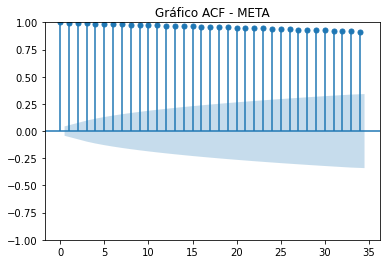

<Figure size 864x432 with 0 Axes>

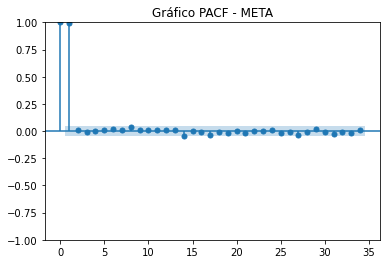

ADF Statistic after differencing for META: -45.37704267810831
P-value after differencing for META: 0.0

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11627.595, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11629.531, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11629.531, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11625.660, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11631.531, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.359 seconds
Melhor modelo ARIMA para META: (0, 1, 0)

Métricas para META:
MSE: 9517.6639
MAE: 80.1636
R²: -0.5046
MAPE: 0.33%



In [4]:
for ticker in tickers:
    df = stocks_data[ticker]
    
    # Dividir os dados em treino e teste
    train_size = int(len(df) * 0.8)
    train, test = df[:train_size], df[train_size:]

    # Remover NaNs
    train = train.dropna()
    test = test.dropna()

    # Verificando a estacionaridade
    result = adfuller(train['Adj Close'])
    print(f"ADF Statistic for {ticker}: {result[0]}")
    print(f"P-value for {ticker}: {result[1]}")
    
    # Gráficos ACF e PACF
    plt.figure(figsize=(12, 6))
    plot_acf(train['Adj Close'].dropna())
    plt.title(f'Gráfico ACF - {ticker}')
    plt.show()

    plt.figure(figsize=(12, 6))
    plot_pacf(train['Adj Close'].dropna())
    plt.title(f'Gráfico PACF - {ticker}')
    plt.show()

    # Diferenciação para tornar a série estacionária
    train['Adj Close Diff'] = train['Adj Close'].diff()
    train.dropna(inplace=True)  # Remover NaNs após a diferenciação

    result_diff = adfuller(train['Adj Close Diff'].dropna())
    print(f"ADF Statistic after differencing for {ticker}: {result_diff[0]}")
    print(f"P-value after differencing for {ticker}: {result_diff[1]}\n")
    
    # Ajuste do modelo usando auto_arima
    model = auto_arima(train['Adj Close'], 
                       start_p=0, start_q=0, max_p=5, max_q=5, 
                       seasonal=False, trace=True, 
                       error_action='ignore', suppress_warnings=True, 
                       stepwise=True, information_criterion='aic')

    print(f'Melhor modelo ARIMA para {ticker}: {model.order}\n')
    
    

    # Previsões
    forecast = model.predict(n_periods=len(test))  # Prever o tamanho do conjunto de teste
    
    # Cálculo das métricas de erro
    if not test['Adj Close'].isnull().any():
        mse = mean_squared_error(test['Adj Close'].values, forecast)
        mae = mean_absolute_error(test['Adj Close'].values, forecast)
        r2 = r2_score(test['Adj Close'].values, forecast)
        mape = mean_absolute_percentage_error(test['Adj Close'], forecast)
        
        print(f"Métricas para {ticker}:")
        print(f"MSE: {mse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R²: {r2:.4f}")
        print(f"MAPE: {mape:.2f}%\n")

        # Armazenar as previsões, adicionando a coluna 'Ticker'
        temp_df = pd.DataFrame({
            'Date': test.index,  # Data dos valores de teste
            'Predicted': forecast,
            'Ticker': ticker
        })
        predicted_values = pd.concat([predicted_values, temp_df], ignore_index=True)

In [5]:
predicted_values.set_index('Date', inplace=True)

In [6]:
for ticker in stocks_data:
    stocks_data[ticker]['Date'] = stocks_data[ticker].index
all_stocks_data = pd.concat(stocks_data.values(), ignore_index=True)

/var/folders/2s/jl00qj1d10q6c4545t6z7tk00000gn/T/ipykernel_59385/4129459862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data[ticker]['Date'] = stocks_data[ticker].index


In [7]:
merged_data = pd.merge(
    predicted_values.reset_index(),  
    all_stocks_data[['Date', 'Adj Close', 'Ticker']],
    on=['Date', 'Ticker'],
    how='inner'
)
merged_data.rename(columns={'Adj Close': 'Real'}, inplace=True)

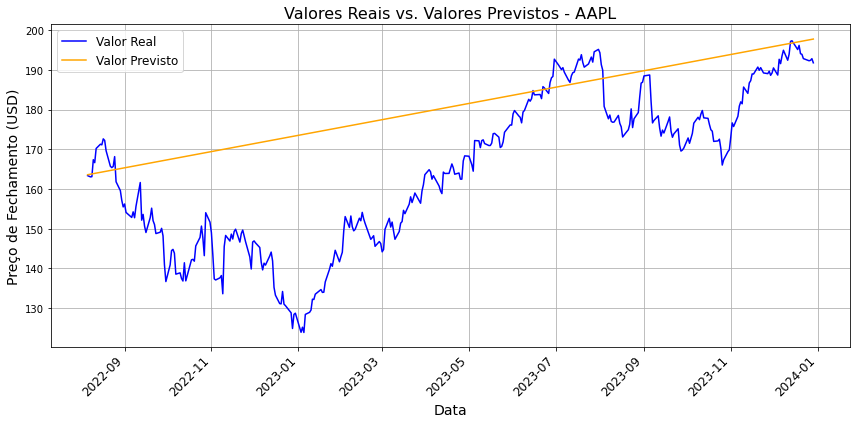

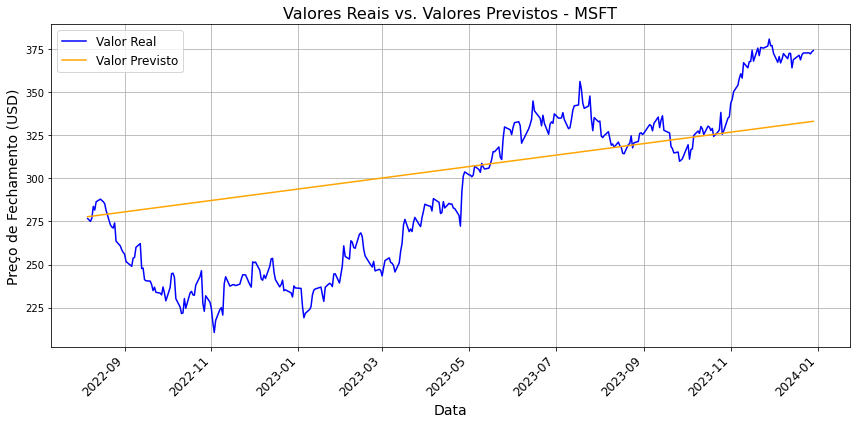

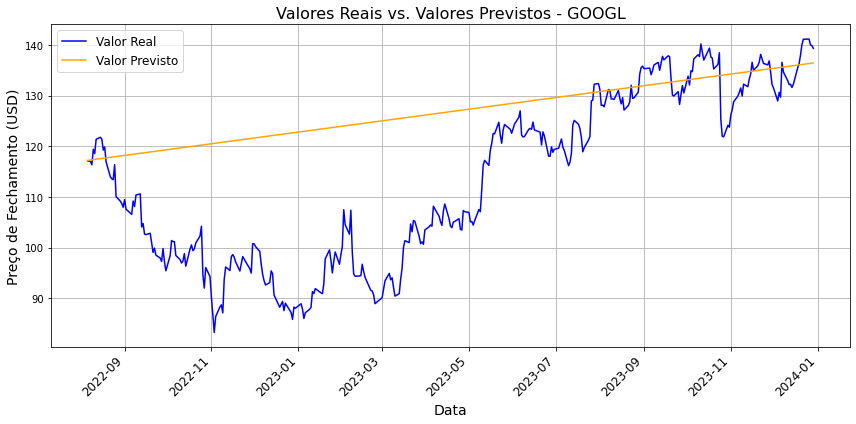

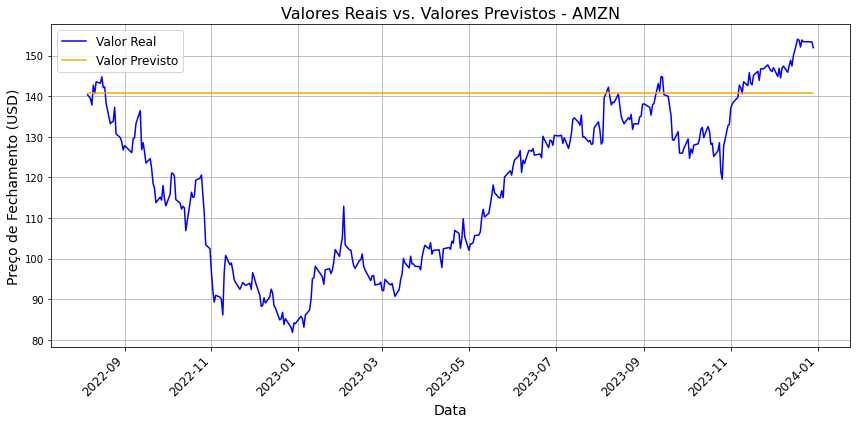

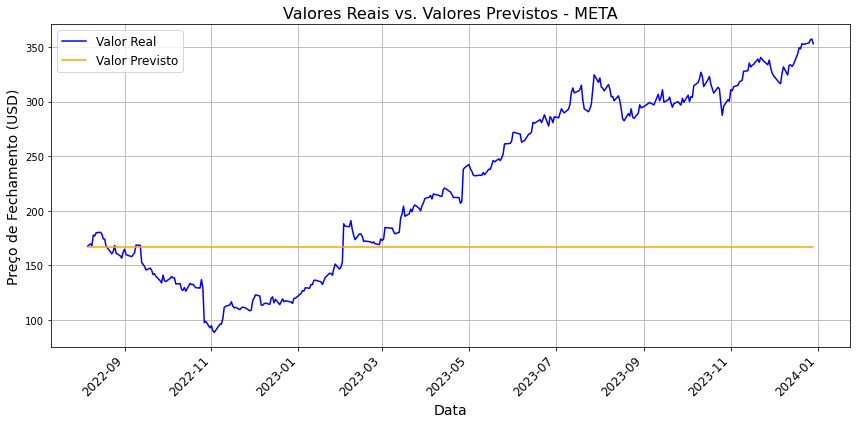

In [8]:
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    merged_ticker_data = merged_data[merged_data['Ticker'] == ticker].dropna()

    if not merged_ticker_data.empty:
        # Certifique-se de que a coluna 'Date' é um array 1D de valores
        dates = merged_ticker_data['Date'].values  # Converte a coluna para um array numpy
        real_values = merged_ticker_data['Real'].values
        predicted_values = merged_ticker_data['Predicted'].values

        # Plota os valores reais e previstos
        plt.plot(dates, real_values, label='Valor Real', color='blue')
        plt.plot(dates, predicted_values, label='Valor Previsto', color='orange')

        # Configuração do gráfico
        plt.title(f'Valores Reais vs. Valores Previstos - {ticker}', fontsize=16)
        plt.xlabel('Data', fontsize=14)
        plt.ylabel('Preço de Fechamento (USD)', fontsize=14)
        plt.legend(fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.grid(True)
        plt.tight_layout()

        # Exibir o gráfico
        plt.show()
    else:
        print(f"Nenhum dado disponível para o ticker {ticker}.")